<a href="https://colab.research.google.com/github/mukul9155/Cardiovascular-disease-prediction/blob/main/Cardiovasular_disease_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem statement

The dataset is from an ongoing cardiovascular study on residents of the town of Framingham,
Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of
future coronary heart disease (CHD). The dataset provides the patients’ information. It includes
over 3,500 records and 17 attributes.

In [1]:
# Importing libraries
import pandas as pd 
import numpy as np

# Importing visualization packages
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import seaborn as seabornInstance
from pandas.plotting import scatter_matrix

# Importing machine learning packages
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from matplotlib import style
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')


## Reading  the file 

In [2]:
from google.colab import drive

In [3]:
# Insert the data file
path = '/content/drive/MyDrive/Colab Notebooks/data_cardiovascular_risk.csv'

In [4]:
# Importing the dataset
data = pd.read_csv(path)

In [5]:
# Creating Dataframe
data = pd.DataFrame(data)

## More understanding of the data

In [6]:
# Viewing top 10 rows of the data
data.head(10)

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
5,5,61,3.0,F,NO,0.0,0.0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0,1
6,6,61,1.0,M,NO,0.0,0.0,0,1,0,238.0,232.0,136.0,24.83,75.0,79.0,0
7,7,36,4.0,M,YES,35.0,0.0,0,0,0,295.0,102.0,68.0,28.15,60.0,63.0,0
8,8,41,2.0,F,YES,20.0,NaN,0,0,0,220.0,126.0,78.0,20.70,86.0,79.0,0
9,9,55,2.0,F,NO,0.0,0.0,0,1,0,326.0,144.0,81.0,25.71,85.0,NaN,0


In [7]:
# View of bottom 10 rows of the data
data.tail(10)

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3380,3380,56,1.0,F,YES,20.0,0.0,0,0,0,240.0,125.0,79.0,27.38,80.0,82.0,0
3381,3381,63,1.0,F,NO,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
3382,3382,43,4.0,M,NO,0.0,0.0,0,1,0,260.0,129.0,90.0,25.29,70.0,62.0,0
3383,3383,57,3.0,F,NO,0.0,0.0,0,0,0,210.0,131.0,85.0,26.59,70.0,77.0,0
3384,3384,61,1.0,F,NO,0.0,0.0,0,1,0,217.0,182.0,86.0,26.98,105.0,113.0,0
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


In [8]:
# Knowing the rows and columns of the data
data.shape

(3390, 17)

In [9]:
# Creating the copy of the original data
df = data.copy()

In [10]:
# Loading the new data
df

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0


## Handling missing values, Outliers and Duplicate Data

In [11]:
# Checking the null values
df.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [12]:
# Droping the useless data
df.drop('id',axis=1, inplace=True)
df.drop('education',axis=1, inplace=True)

 we can drop two columns education and id as it doesnot affect heart disease

In [13]:
# Dataset after deleting two columns
df

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,36,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,60,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,46,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,44,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,60,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0


In [14]:
# Replacing the categorical data into boolean 
df['sex'].replace({'M':'1','F':'0'}, inplace = True)
df['is_smoking'].replace({'YES':'1','NO':'0'}, inplace = True)

In [15]:
# Dataset after replacing the columns
df

,age,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,0,1,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,36,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,0,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3385,60,0,0,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,46,0,0,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,44,1,1,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,60,1,0,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0


In [16]:
# Droping the missing data
df = df.dropna()

In [17]:
# Finding the shape of new dataset
df.shape

(3004, 15)

In [18]:
# Checking the null values in new dataset
df.isnull().sum()

age                0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [19]:
# Cecking of null values using boolean
df.isna().any()

age                False
sex                False
is_smoking         False
cigsPerDay         False
BPMeds             False
prevalentStroke    False
prevalentHyp       False
diabetes           False
totChol            False
sysBP              False
diaBP              False
BMI                False
heartRate          False
glucose            False
TenYearCHD         False
dtype: bool

In [20]:
# Checking the duplicate values
len(df[df.duplicated()])

0

In [21]:
# Details of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3004 entries, 1 to 3389
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3004 non-null   int64  
 1   sex              3004 non-null   object 
 2   is_smoking       3004 non-null   object 
 3   cigsPerDay       3004 non-null   float64
 4   BPMeds           3004 non-null   float64
 5   prevalentStroke  3004 non-null   int64  
 6   prevalentHyp     3004 non-null   int64  
 7   diabetes         3004 non-null   int64  
 8   totChol          3004 non-null   float64
 9   sysBP            3004 non-null   float64
 10  diaBP            3004 non-null   float64
 11  BMI              3004 non-null   float64
 12  heartRate        3004 non-null   float64
 13  glucose          3004 non-null   float64
 14  TenYearCHD       3004 non-null   int64  
dtypes: float64(8), int64(5), object(2)
memory usage: 375.5+ KB


After removing missing data,Now 3004 entries are present and there is no null values, Out of which 8- float data type, 5-integer data type and 2- object data type.

In [22]:
# Getting the list of columns
list(df.columns)

['age',
 'sex',
 'is_smoking',
 'cigsPerDay',
 'BPMeds',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes',
 'totChol',
 'sysBP',
 'diaBP',
 'BMI',
 'heartRate',
 'glucose',
 'TenYearCHD']

## Description of columns

Demographic:

• Sex: male or female("M" or "F")

• Age: Age of the patient

• is_smoking: whether or not the patient is a current smoker ("YES" or "NO")

• Cigs Per Day: the number of cigarettes that the person smoked on average in 
one day.


Medical( history)


• BP Meds: whether or not the patient was on blood pressure medication (Nominal)

• Prevalent Stroke: whether or not the patient had previously had a stroke 
(Nominal)
• Prevalent Hyp: whether or not the patient was hypertensive (Nominal)

• Diabetes: whether or not the patient had diabetes (Nominal)


Medical(current)

• Tot Chol: total cholesterol level (Continuous)

• Sys BP: systolic blood pressure (Continuous)

• Dia BP: diastolic blood pressure (Continuous)

• BMI: Body Mass Index (Continuous)

• Heart Rate: heart rate 

• Glucose: glucose level 

• 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” 
means “No”)



## Description of dataset to find insights from the data

In [23]:
# Description of dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,3004.0,49.521305,8.595076,32.00,42.0000,49.00,56.0000,70.0
cigsPerDay,3004.0,9.078562,11.890855,0.00,0.0000,0.00,20.0000,70.0
BPMeds,3004.0,0.030293,0.171421,0.00,0.0000,0.00,0.0000,1.0
prevalentStroke,3004.0,0.005992,0.077189,0.00,0.0000,0.00,0.0000,1.0
prevalentHyp,3004.0,0.314913,0.464559,0.00,0.0000,0.00,1.0000,1.0
diabetes,3004.0,0.027297,0.162974,0.00,0.0000,0.00,0.0000,1.0
totChol,3004.0,237.222370,45.267516,113.00,206.0000,234.00,265.0000,696.0
sysBP,3004.0,132.591711,22.270882,83.50,117.0000,128.50,144.0000,295.0
diaBP,3004.0,82.923103,12.038348,48.00,74.5000,82.00,90.0000,142.5
BMI,3004.0,25.824041,4.121130,15.96,23.0575,25.41,28.0725,56.8


# Exploratory data analysis of the given dataset

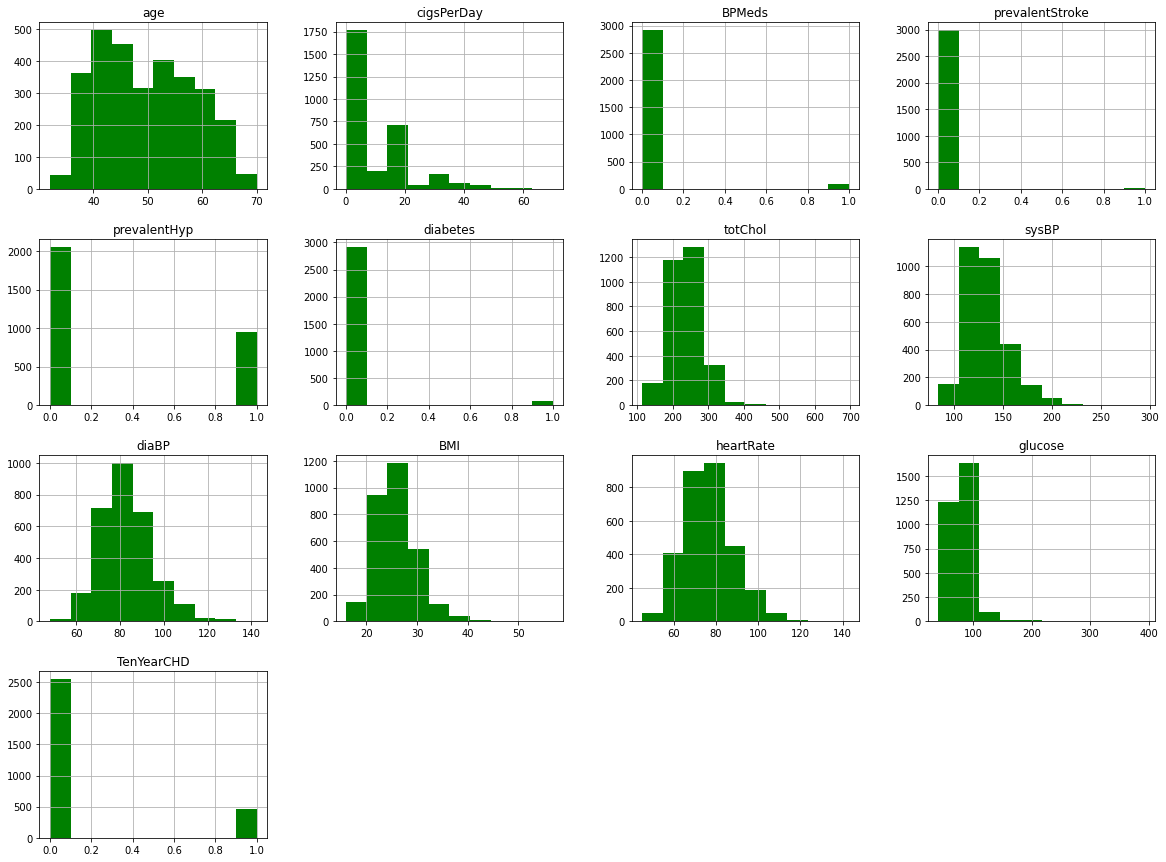

In [24]:
# Plotting histogram of dataset
df.hist(figsize=(20,15),color='g')
plt.show()

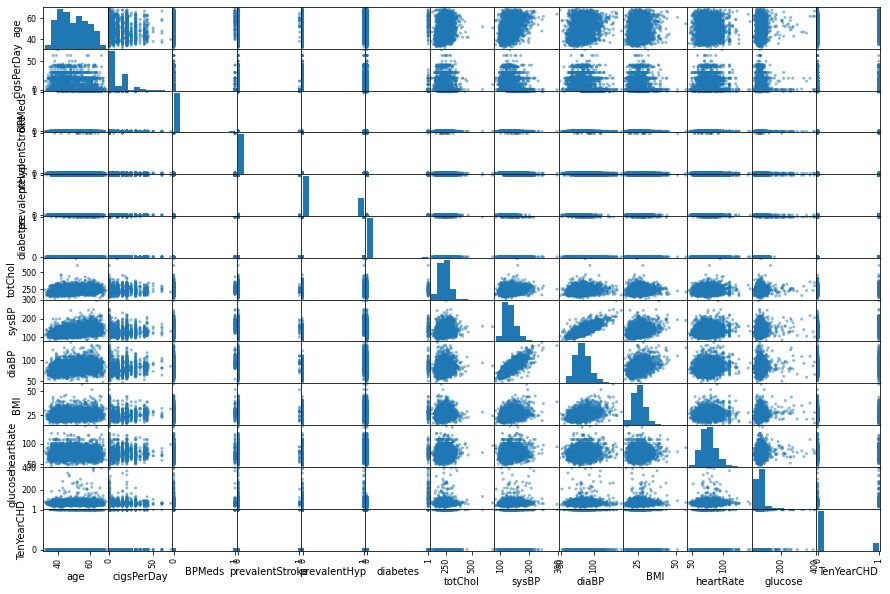

In [25]:
# Scatter plot of dataset
scatter_matrix(df, figsize=(15,10))
plt.show()

In [26]:
# Finding the corelation of the data 
df.corr()

,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
age,1.000000,-0.185938,0.135508,0.048996,0.310227,0.112029,0.274599,0.402750,0.227066,0.139114,0.009960,0.109860,0.231329
cigsPerDay,-0.185938,1.000000,-0.037272,-0.046590,-0.078206,-0.051627,-0.025286,-0.102654,-0.066650,-0.097959,0.060842,-0.064884,0.066510
BPMeds,0.135508,-0.037272,1.000000,0.112111,0.260692,0.077668,0.092726,0.279223,0.206065,0.089444,0.011825,0.066319,0.087372
prevalentStroke,0.048996,-0.046590,0.112111,1.000000,0.058798,0.013465,0.002192,0.061183,0.058909,0.028345,-0.017963,0.020944,0.051183
prevalentHyp,0.310227,-0.078206,0.260692,0.058798,1.000000,0.084347,0.161685,0.699151,0.611798,0.305000,0.151095,0.084696,0.165798
diabetes,0.112029,-0.051627,0.077668,0.013465,0.084347,1.000000,0.067154,0.111516,0.059457,0.095808,0.050840,0.618810,0.099689
totChol,0.274599,-0.025286,0.092726,0.002192,0.161685,0.067154,1.000000,0.207890,0.159637,0.113176,0.094119,0.063023,0.104759
sysBP,0.402750,-0.102654,0.279223,0.061183,0.699151,0.111516,0.207890,1.000000,0.783036,0.338724,0.179230,0.133070,0.213669
diaBP,0.227066,-0.066650,0.206065,0.058909,0.611798,0.059457,0.159637,0.783036,1.000000,0.389107,0.170581,0.072780,0.137392
BMI,0.139114,-0.097959,0.089444,0.028345,0.305000,0.095808,0.113176,0.338724,0.389107,1.000000,0.075289,0.095579,0.075374


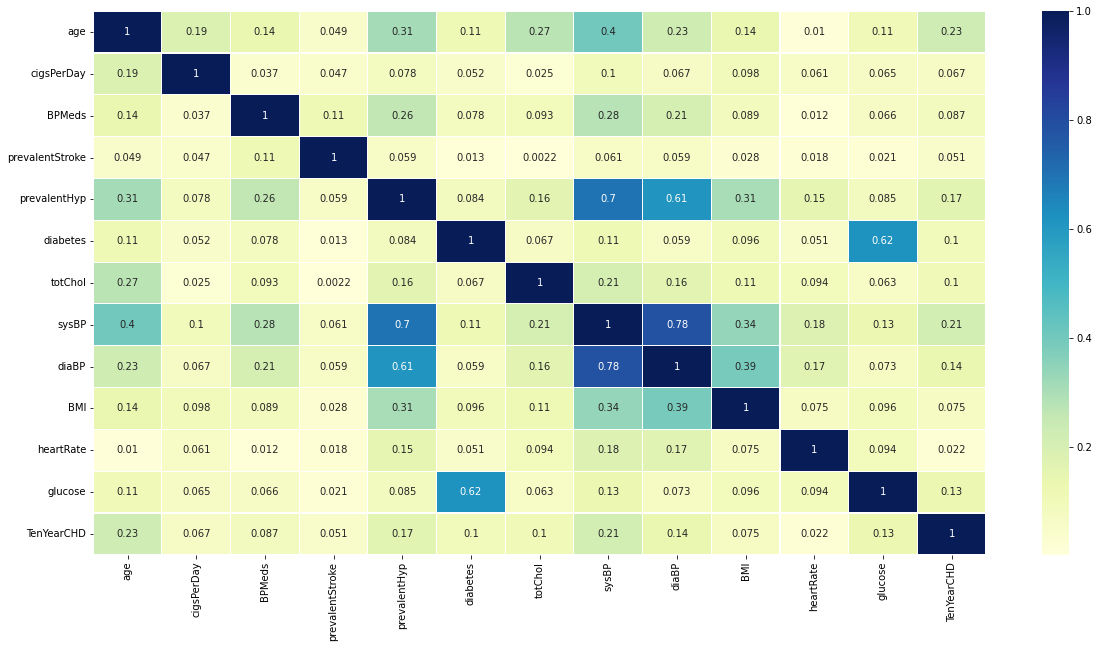

In [27]:
# showing the corelation with graph
plt.figure(figsize=(20,10))
correlation = df.corr()
sns.heatmap(abs(correlation), linewidths=0.1, annot=True, cmap='YlGnBu')
plt.show()

1. sysBP and diaBP, sysBP and prevalentHyp are highly corelated with values around 0.7 and above.


2. prevalentHYP and diaBP, glucose and diabates are also corelated to some extent of around 0.62.






In [28]:
# Finding the CHD patients 
df['TenYearCHD'].value_counts()

0    2547
1     457
Name: TenYearCHD, dtype: int64

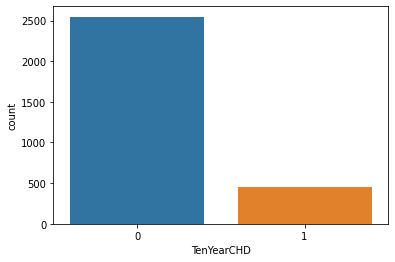

In [29]:
sns.countplot(df['TenYearCHD'])
plt.show()

## Bar plot of boolean dependent data with independent variable

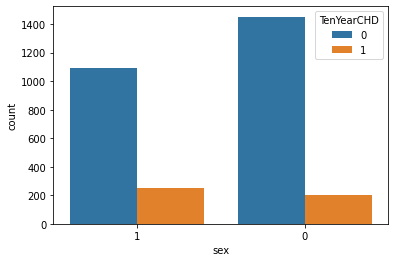

In [30]:
sns.countplot(data=df, x='sex', hue='TenYearCHD')
plt.show()

1. Male has more risk of getting CHD than Female

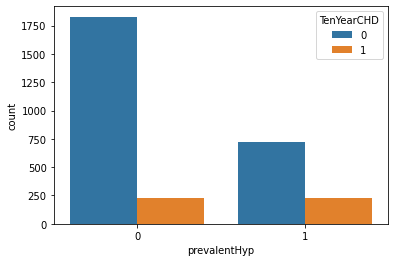

In [31]:
sns.countplot(data=df, x='prevalentHyp', hue='TenYearCHD')
plt.show()

1. Higher percentage of people having hypertension suffer from CHD

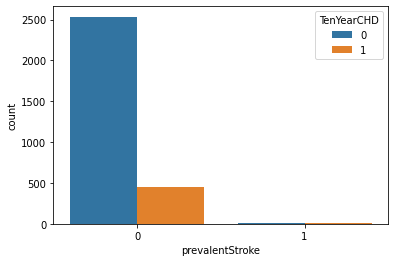

In [32]:
sns.countplot(data=df, x='prevalentStroke', hue='TenYearCHD')
plt.show()

1. Almost 80-90% patients having prevalent stroke are getting CHD

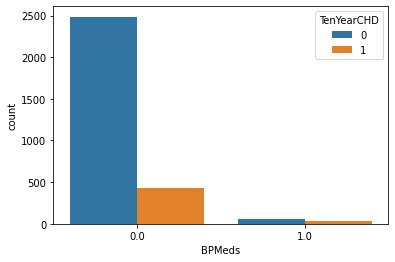

In [33]:
sns.countplot(data=df, x='BPMeds', hue='TenYearCHD')
plt.show()

1. It can be said that 60-70% of patients taking BP meds getting CHD

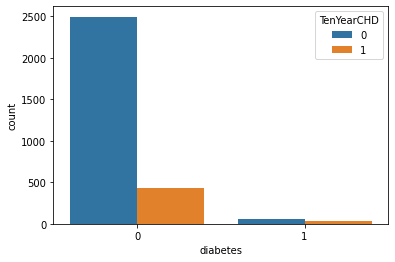

In [34]:
sns.countplot(data=df, x='diabetes', hue='TenYearCHD')
plt.show()

1. It seems that 60-70% of patients who have diabetes are getting CHD

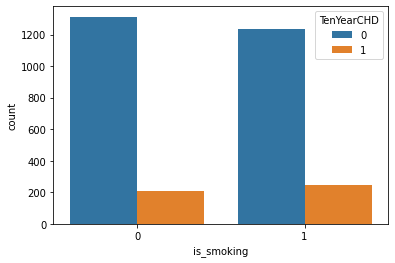

In [35]:
sns.countplot(data=df, x='is_smoking', hue='TenYearCHD')
plt.show()

1. Patients who smoke have slightly higher risk of getting CHD than non smoker

## Violin plot of numerical data with independent variable

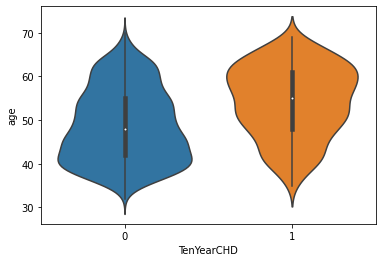

In [36]:
sns.violinplot(y='age',x='TenYearCHD',data=df)
plt.show()

1. Patients who got CHD are in the age group:45- 65

2. Patients around the age group:30- 45 does not suffer from CHD mostly

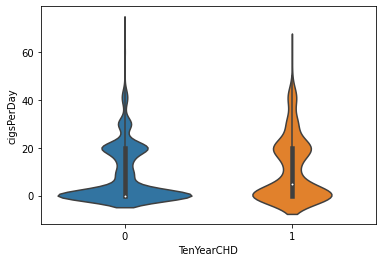

In [37]:
sns.violinplot(y='cigsPerDay',x='TenYearCHD',data=df)
plt.show()

1. It is surprised to know that patients who didn't smoke suffered from CHD

2. More the cigarretes they smoke higher is the chance of getting CHD



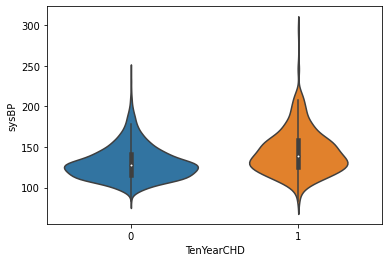

In [38]:
sns.violinplot(y='sysBP',x='TenYearCHD',data=df)
plt.show()

1. Patients who have higher systole BP have higher chances of getting CHD

2. Patients whose systole BP is around 120 are mostly safe

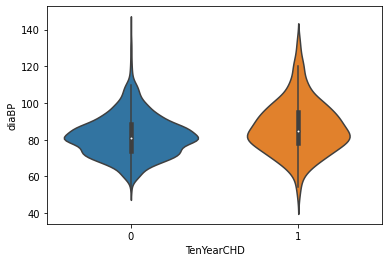

In [39]:
sns.violinplot(y='diaBP',x='TenYearCHD',data=df)
plt.show()

1. Patients who have higher diastole BP have higher chances of getting CHD

2. Patients whose diastole BP is around 70-80 are mostly safe

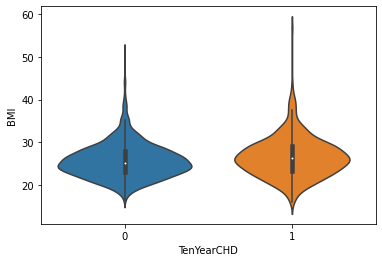

In [40]:
sns.violinplot(y='BMI',x='TenYearCHD',data=df)
plt.show()

1. It is said that BMI doesn't affect the chance of getting CHD

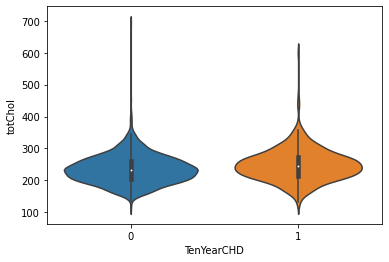

In [41]:
sns.violinplot(y='totChol',x='TenYearCHD',data=df)
plt.show()

1. It is said that Cholestrol level doesn't affect the chance of getting CHD

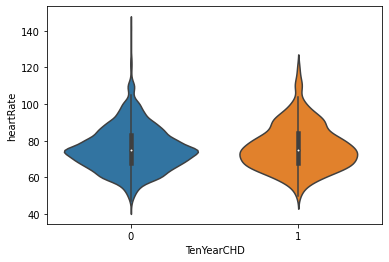

In [42]:
sns.violinplot(y='heartRate',x='TenYearCHD',data=df)
plt.show()

1. Heart rate is in range of 70-75 is mostly safe

2. Heart rate above or below the range of 70-75 can cause CHD

In [43]:
# Finding the patients with CHD 
print('Percentage of patients with heart disase:{:.2f}%'.format(len(df[df.TenYearCHD==1])*100/len(df.TenYearCHD)))

Percentage of patients with heart disase:15.21%


In [44]:
# Finding the patients with no CHD
print('Percentage of patients with no heart disase:{:.2f}%'.format(len(df[df.TenYearCHD==0])*100/len(df.TenYearCHD)))

Percentage of patients with no heart disase:84.79%


In [45]:
# Finding the male and female patients
df.sex.value_counts()

0    1657
1    1347
Name: sex, dtype: int64

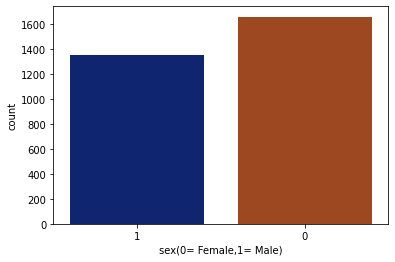

In [46]:
sns.countplot(x='sex',data=df,palette='dark')
#plt.legend('Female','Male')
plt.xlabel('sex(0= Female,1= Male)')
plt.show()

## Implementation of Regression

In [47]:
# Create the data of independent variables
x = df.drop(['TenYearCHD'],axis=1)

# Create the data of dependent variable 
y = df[['TenYearCHD']].values

In [48]:
print(x.shape)

(3004, 14)


In [49]:
print(y.shape)

(3004, 1)


In [50]:
# Splitting the dataset into the Training set and Test set
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state=0)

In [51]:
# Finding the rows and coloumns of train and test data
print(x_train.shape)
print(x_test.shape)

(2403, 14)
(601, 14)


## Models

The algorithms that we will be used are:

1. Logistic Regression

2. k-Nearest Neighbours

3. Decision Trees

4. Support Vector Machine

5. Random Forest Classification

6. Naive Bayes


## Checking the performance of test dataset using different models

In [52]:
# Storing the accuracies obtained from different models
accuracies = {}

## Logistic Regression

Logistic Regression is a Machine Learning classification algorithm that is used to predict the probability of a categorical dependent variable. 

In [53]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
acc = accuracy_score(y_test, y_pred)*100
accuracies['Logistic Regression']= acc
print(f"The accuracy score for LogisticRegression is: {acc}%")
f1 = f1_score(y_test, y_pred)*100
print(f"The f1 score for LogisticRegression is: {f1}%")
precision = precision_score(y_test, y_pred)*100
print(f"The precision score for LogisticRegression is: {precision}%")
recall = recall_score(y_test, y_pred)*100
print(f"The recall score for LogisticRegression is: {recall}%")

The accuracy score for LogisticRegression is: 83.69384359400999%
The f1 score for LogisticRegression is: 10.909090909090908%
The precision score for LogisticRegression is: 66.66666666666666%
The recall score for LogisticRegression is: 5.9405940594059405%


## KNN

The k-nearest neighbors (KNN) algorithm is a simple, easy-to-implement supervised machine learning algorithm that can be used to solve both classification and regression problems.

In [54]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
acc = accuracy_score(y_test, y_pred)*100
accuracies['KNN']= acc
print(f"The accuracy score for Kneighbours is: {acc}%")
f1 = f1_score(y_test, y_pred)*100
print(f"The f1 score for Kneighbours is: {f1}%")
precision = precision_score(y_test, y_pred)*100
print(f"The precision score for Kneighbours is: {precision}%")
recall = recall_score(y_test, y_pred)*100
print(f"The recall score for Kneighbours is: {recall}%")

The accuracy score for Kneighbours is: 82.02995008319468%
The f1 score for Kneighbours is: 6.896551724137932%
The precision score for Kneighbours is: 26.666666666666668%
The recall score for Kneighbours is: 3.9603960396039604%


## Support vector machine

Support Vector Machine or SVM is one of the most popular Supervised Learning algorithms, which is used for Classification as well as Regression problems. However, primarily, it is used for Classification problems in Machine Learning.

In [55]:
svm = SVC(random_state=1)
svm.fit(x_train, y_train)
y_pred = svm.predict(x_test)
acc = accuracy_score(y_test, y_pred)*100
accuracies['SVM']= acc
print(f"The accuracy score for SVC is: {acc}%")
f1 = f1_score(y_test, y_pred)*100
print(f"The f1 score for SVC is: {f1}%")
precision = precision_score(y_test, y_pred)*100
print(f"The precision score for SVC is: {precision}%")
recall = recall_score(y_test, y_pred)*100
print(f"The recall score for SVC is: {recall}%")

The accuracy score for SVC is: 83.36106489184692%
The f1 score for SVC is: 1.9607843137254901%
The precision score for SVC is: 100.0%
The recall score for SVC is: 0.9900990099009901%


## Naive Bayes

Naive Bayes classifiers are a collection of classification algorithms based on Bayes’ Theorem. It is not a single algorithm but a family of algorithms where all of them share a common principle

In [56]:
nb = GaussianNB()
nb.fit(x_train, y_train)
y_pred = nb.predict(x_test)
acc = accuracy_score(y_test, y_pred)*100
accuracies['Naive Bayes']= acc
print(f"The accuracy score for Naive Bayes is: {acc}%")
f1 = f1_score(y_test, y_pred)*100
print(f"The f1 score for Naive Bayes is: {f1}%")
precision = precision_score(y_test, y_pred)*100
print(f"The precision score for Naive Bayes is: {precision}%")
recall = recall_score(y_test, y_pred)*100
print(f"The recall score for Naive Bayes is: {recall}%")

The accuracy score for Naive Bayes is: 81.36439267886855%
The f1 score for Naive Bayes is: 32.53012048192771%
The precision score for Naive Bayes is: 41.53846153846154%
The recall score for Naive Bayes is: 26.732673267326735%


## Decision Tree

A decision tree is a flowchart-like structure in which each internal node represents a test on a feature, each leaf node represents a class label and branches represent conjunctions of features that lead to those class labels.

In [57]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
y_pred = dtc.predict(x_test)
acc = accuracy_score(y_test, y_pred)*100
accuracies['Decision Tree']= acc
print(f"The accuracy score for Decision Tree is: {acc}%")
f1 = f1_score(y_test, y_pred)*100
print(f"The f1 score for Decision Tree is: {f1}%")
precision = precision_score(y_test, y_pred)*100
print(f"The precision score for Decision Tree is: {precision}%")
recall = recall_score(y_test, y_pred)*100
print(f"The recall score for Decision Tree is: {recall}%")

The accuracy score for Decision Tree is: 74.70881863560732%
The f1 score for Decision Tree is: 20.833333333333336%
The precision score for Decision Tree is: 21.978021978021978%
The recall score for Decision Tree is: 19.801980198019802%


## Random Forest

The Random Forest Classifier is a set of decision trees from randomly selected subset of training set. It aggregates the votes from different decision trees to decide the final class of the test object.

In [58]:
rf = RandomForestClassifier(n_estimators = 1000, random_state = 2)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
acc = accuracy_score(y_test, y_pred)*100
accuracies['Random Forest']= acc
print(f"The accuracy score for Random Forest is: {acc}%")
f1 = f1_score(y_test, y_pred)*100
print(f"The f1 score for Random Forest is: {f1}%")
precision = precision_score(y_test, y_pred)*100
print(f"The precision score for Random Forest is: {precision}%")
recall = recall_score(y_test, y_pred)*100
print(f"The recall score for Random Forest is: {recall}%")

The accuracy score for Random Forest is: 83.36106489184692%
The f1 score for Random Forest is: 9.09090909090909%
The precision score for Random Forest is: 55.55555555555556%
The recall score for Random Forest is: 4.9504950495049505%


In [59]:
# Confusion matrix
confusion_matrix(y_test, y_pred)

array([[496,   4],
       [ 96,   5]])

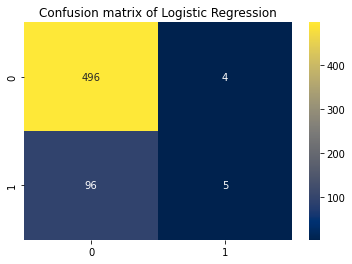

In [60]:
lr_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(pd.DataFrame(lr_matrix), annot=True,cmap="cividis" , fmt='g')
plt.title('Confusion matrix of Logistic Regression')
plt.show()

## Comparing the accuracies of different models

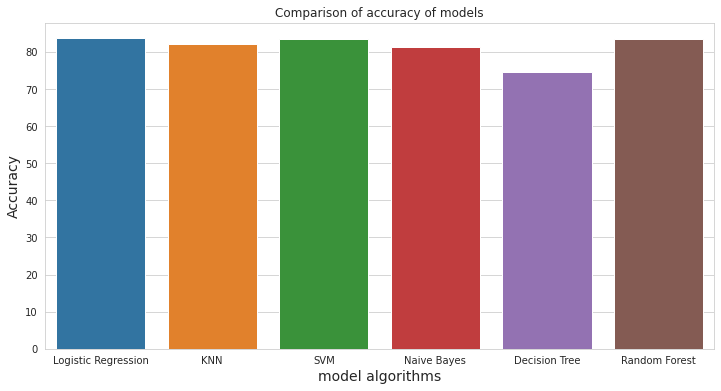

In [61]:
plt.figure(figsize=(12,6))
sns.set_style('whitegrid')
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()))
plt.title('Comparison of accuracy of models')
plt.xlabel('model algorithms', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.show()

By the above visualization we see that all the six models are being compared to eachother with respect to their accuracies. 

Logistic Regression has the highest accuracy in all the models as per the observation in the above barplot

Logistic Regression : 83.693%

KNN : 82.029%

Decision Tree : 76.206%

SVM : 83.361%

Random Forest :83.361%

Naive Bayes : 81.364%


**Observation:**

Logistic regression has the highest accuracy.

## Model Result

In [62]:
new_data = {'Model':['Logistic Regression','KNN','SVM','Naive Bayes','Decision Tree','Random Forest'],
        'F1 Score':[10.909,6.896,1.960,32.530,23.404,9.090],'Accuracies':[83.693,82.029,83.361,81.364,76.039,83.361],
        'Recall':[5.940,3.960,0.999,26.732,21.782,4.950],'Precision':[66.666,26.666,100.000,41.538,25.287,4.950]}

# Create DataFrame
result_stat = pd.DataFrame(new_data)

# Print the output.
print(result_stat)

                 Model  F1 Score  Accuracies  Recall  Precision
0  Logistic Regression    10.909      83.693   5.940     66.666
1                  KNN     6.896      82.029   3.960     26.666
2                  SVM     1.960      83.361   0.999    100.000
3          Naive Bayes    32.530      81.364  26.732     41.538
4        Decision Tree    23.404      76.039  21.782     25.287
5        Random Forest     9.090      83.361   4.950      4.950


Final result:

The accuracy was observed the highest at Logistic Regression with -

Accuracy score: 83.69384359400999%

F1 score: 10.909090909090908%

Precision score: 66.66666666666666%

Recall score: 5.9405940594059405%


## Conclusion

As observed by the visualizations,

Age is directly proportional to the target variable (TenYearCHD)

No of cigs per day is a major factor for predicting the heart disease.

Diabetic patients whose glucose level ranging from 200-400, have higher risk of getting CHD.

About 90% of stroke patients get CHD

Patients who have higher systole BP have higher chances of getting CHD

Patients whose diastole BP is around 75-80 are mostly safe